In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate,special
from scipy.linalg import eig,eigh,eigvals,eigvalsh
from scipy.sparse.linalg import eigs
from permutations import get_dicts, rho_3new, rho_2new
import qutip as q

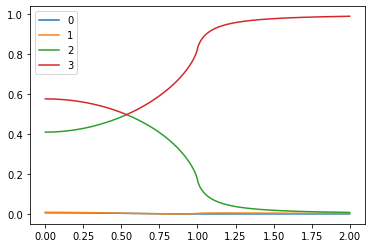

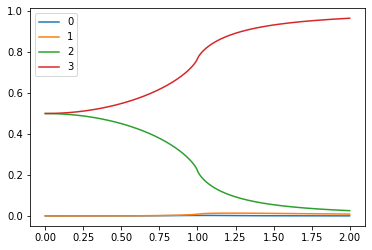

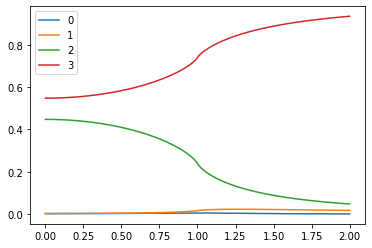

In [2]:
lambdarange=np.linspace(0,2,500)
for gs in [0.5,1.0,1.5]:

    dic,perm=get_dicts()
    rho_dic_theo={}
    for l in lambdarange:
        rho_dic_theo[l]=rho_2new(dic,perm,l,gs)
        
    theovec=np.zeros((len(lambdarange),4))

    for k in range(4):

        for i,el in enumerate(lambdarange):
            theovec[i,k]=eigvalsh(rho_dic_theo[el])[k]

    for k in range(4):

        plt.plot(lambdarange,theovec[:,k],label=k)
        
    plt.legend()
    plt.show()    

[1.08672037 1.08663346 1.08645908 1.08619656 1.0858449  1.08540272
 1.08486831 1.08423957 1.08351403 1.08268881 1.0817606  1.08072567
 1.07957977 1.07831817 1.0769356  1.07542616 1.07378334 1.07199991
 1.0700679  1.06797847 1.06572185 1.06328724 1.06066269 1.05783494
 1.05478929 1.05150937 1.04797696 1.04417167 1.04007067 1.03564827
 1.03087546 1.02571938 1.02014257 1.01410215 1.00754875 1.00042513
 0.99266454 0.98418848 0.97490403 0.96470034 0.95344463 0.94097868
 0.92712273 0.91176502 0.89450663 0.87437996 0.85015718 0.81983491
 0.7793986  0.71616221 0.61391064 0.55012885 0.50086661 0.4605648
 0.42661032 0.39744487 0.37203336 0.34964348 0.32973489 0.31189636
 0.29580743 0.28121352 0.26790916 0.25572624 0.24452561 0.23419096
 0.2246241  0.21574157 0.20747184 0.19975322 0.19253223 0.18576218
 0.17940217 0.17341616 0.1677723  0.16244226 0.15740084 0.15262545
 0.14809586 0.14379383 0.1397029  0.13580819 0.13209618 0.12855456
 0.12517213 0.12193863 0.11884467 0.11588166 0.11304167 0.11031

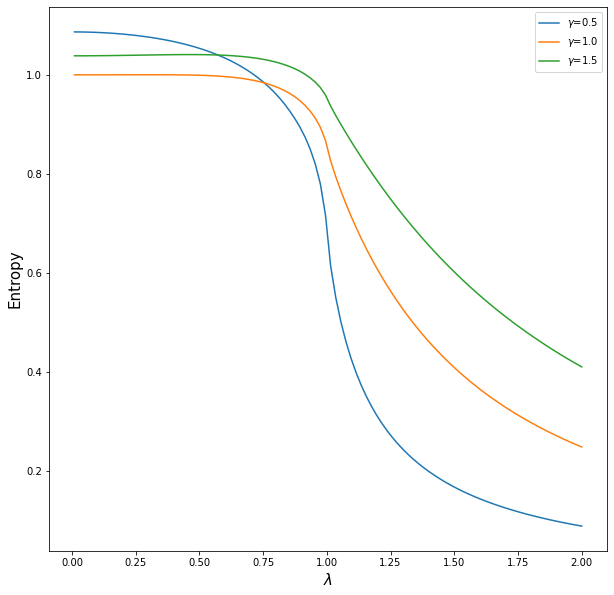

In [28]:
lambdarange=np.linspace(0.01,2,100)
fig, axs = plt.subplots(1,sharex=True,figsize=[10,10])

for gs in [0.5,1.0,1.5]:

    dic,perm=get_dicts()
    rho_dic_theo={}
    for l in lambdarange:
        rho_dic_theo[l]=rho_2new(dic,perm,l,gs)
        
    theovec=np.zeros((len(lambdarange),4))
    entro=np.zeros_like(lambdarange)


    for i,el in enumerate(lambdarange):
        
        for k in range(4):

            theovec[i,k]=eigvalsh(rho_dic_theo[el])[k]
        entro[i]=np.sum([-theovec[i,k]*np.log2(theovec[i,k]) for k in range(4)])
    
    axs.plot(lambdarange,entro,label=r"$\gamma$={:.1f}".format(gs))
plt.xlabel(r"$\lambda$",fontsize=15)
axs.set_ylabel("Entropy",fontsize=15)
plt.legend()
plt.savefig("entropy_3gammas")


C:\Users\alfre\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log2
C:\Users\alfre\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


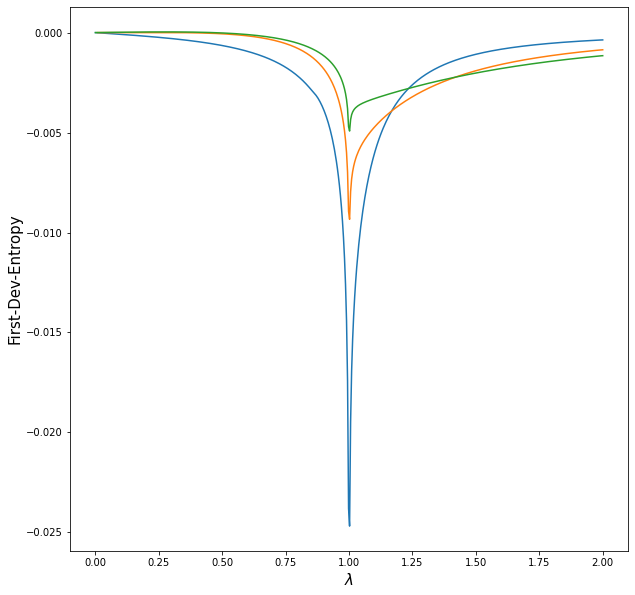

In [30]:
fig, axs = plt.subplots(1,sharex=True,figsize=[10,10])
lambdarange=np.linspace(0,2,500)
for n,gs in enumerate([0.5,1.0,1.5]):

    dic,perm=get_dicts()
    rho_dic_theo={}
    for l in lambdarange:
        rho_dic_theo[l]=rho_2new(dic,perm,l,gs)
        
    theovec=np.zeros((len(lambdarange),4))
    entro=np.zeros_like(lambdarange)


    for i,el in enumerate(lambdarange):
        
        for k in range(4):

            theovec[i,k]=eigvalsh(rho_dic_theo[el])[k]
        
        entro[i]=np.sum([-theovec[i,k]*np.log2(theovec[i,k]) for k in range(4)])
    
    
    axs.plot(lambdarange,np.gradient(entro),label=r"$\gamma$={:.1f}".format(gs))
    plt.xlabel(r"$\lambda$",fontsize=15)
    axs.set_ylabel("First-Dev-Entropy",fontsize=15)

plt.savefig("firstdev_entropy_3gammas")